In [ ]:
#Installation plugin for xml to json
pip install xmltodict

In [ ]:
#installation plugin for google maps
!pip install gmaps

In [64]:
#Importing all the Libraries
import requests
import xml
import csv
import json
import xmltodict
import os
import pandas as pd

#assigning the zillow URL and zillow key
url = 'https://www.zillow.com/webservice/GetSearchResults.htm?'
zid = 'X1-ZWz17han637imj_43hp8'
#use case restricted to San Francisco data
city = 'San%20Francisco'

# Open the file in read mode sourced from data.gov
house_csv = os.path.join("housing_test2.csv")
pd_housing = pd.read_csv(house_csv, encoding="UTF-8")

#creating a dictionary to store the housing data
clean_housing = pd_housing[["APP_NO","NUMBER", "STREET", "ST_TYPE", "PROP_USE", "analysis_neighborhood"]]

#converting the housing data to string
clean_housing["NUMBER"] = clean_housing["NUMBER"].astype(str)
clean_housing["STREET"] = clean_housing["STREET"].astype(str)
clean_housing["ST_TYPE"] = clean_housing["ST_TYPE"].astype(str)

#Concatinating the address into a new column for URL
clean_housing["complete_address"] = clean_housing["NUMBER"] + "+" + clean_housing["STREET"] + "+" + clean_housing["ST_TYPE"]
clean_housing["og_address"] = clean_housing["NUMBER"] + clean_housing["STREET"]  + clean_housing["ST_TYPE"]

#Replacing the blanks with + for URL
clean_housing["complete_address"] = clean_housing["complete_address"].str.replace(' ' , '+', regex=True)

#initializing the index for loop
index = 0

#Looping through the housing data and creating the URL for zillow
for row in clean_housing["complete_address"]:
    address = row
    query_url = url + "zws-id=" + zid + "&address=" + address + "&citystatezip=" + city
    print(query_url)
    clean_housing["query_url"] = query_url
    response = requests.get(query_url)
    with open(address, 'wb') as file:
        file.write(response.content)
    #converting the XML to JSON format
    xpars = xmltodict.parse(response.text)
    response_json = xpars
    
    #Extrating the zillow data and appending it to the dictionary
    try:
#         print (response_json["SearchResults:searchresults"]["response"]["results"]["result"]["zestimate"]["amount"]["#text"])
        clean_housing.at[index, "zestimate"] = response_json["SearchResults:searchresults"]["response"]["results"]["result"]["zestimate"]["amount"]["#text"]
        clean_housing.at[index, "zipcode"] = response_json["SearchResults:searchresults"]["response"]["results"]["result"]["address"]["zipcode"]
        clean_housing.at[index, "latitude"] = response_json["SearchResults:searchresults"]["response"]["results"]["result"]["address"]["latitude"]
        clean_housing.at[index, "longitude"] = response_json["SearchResults:searchresults"]["response"]["results"]["result"]["address"]["longitude"]
    except(KeyError, IndexError):
         print("Missing field/result... skipping.")
    index = index + 1

#Droping all the records where price was not found or nan
clean_housing.dropna(subset = ['zipcode'],inplace=True)

#reseting the index
clean_housing = clean_housing.reset_index()
clean_housing = pd.DataFrame(clean_housing)

#Printing the final housing data with Prices
print(clean_housing)

C:\Users\awatr1\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\awatr1\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\awatr1\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17han637imj_43hp8&address=581+CHENERY+ST&citystatezip=San%20Francisco
https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17han637imj_43hp8&address=2851+FILBERT+ST&citystatezip=San%20Francisco
https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17han637imj_43hp8&address=2925+LARKIN+ST&citystatezip=San%20Francisco
https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17han637imj_43hp8&address=1410+JEFFERSON+ST&citystatezip=San%20Francisco
Missing field/result... skipping.
https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17han637imj_43hp8&address=99+MIGUEL+ST&citystatezip=San%20Francisco
https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17han637imj_43hp8&address=1+JADE+PL&citystatezip=San%20Francisco
https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17han637imj_43hp8&address=45+BURNSIDE+AV&citystatezip=San%20Francisco
htt

C:\Users\awatr1\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


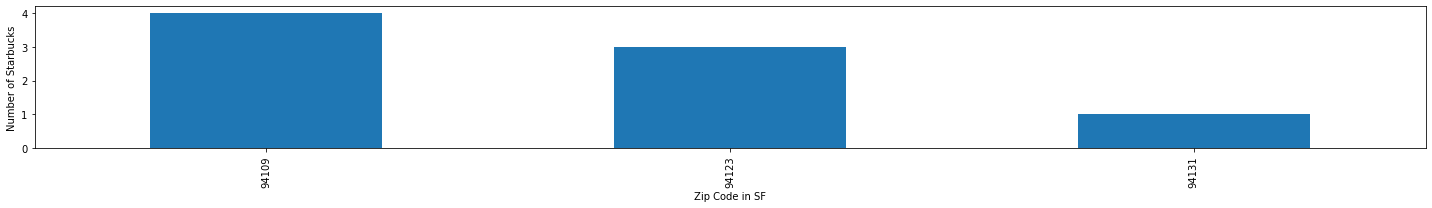

In [81]:
#importing the libraries

import itertools
import matplotlib.pyplot as plt
from config import gkey
import gmaps

#getting all the unique zipcodes
zip_code = clean_housing["zipcode"].unique()

#Assigning the yelp API key and initial parameters
api_key = "wlUyl3ptOfDkxZF-WUtUdINOA5vWrJAFGUZgyYL2YIqFMVzJHApXpFdqk3nWo6037S7iyZrTqRbVT4gEU2BoZb-VN63ejCyX-9gUiCZoHzu3meK_JWkg4MEy5TcSXnYx"
headers = {'Authorization': 'Bearer %s' % api_key}
#yid = "hBiXu1pnUEHPLNbP80H2pA"
url = 'https://api.yelp.com/v3/businesses/search'
# initializing the list to store the yelp values
ratings_starbucks = []
name_starbucks = []
zip_starbucks = []
lat_starbucks = []
lon_starbucks = []
ratings_resturants = []
name_resturants = []
zip_resturants = []
lat_resturants = []
lon_resturants = []
house_zip_sb = []
house_zip_rest = []

#Looping through all the unique zipcodes to get the Businesses from yelp. Passing the parameters to yelp
for i in zip_code:
    params_starbucks = {'term':'starbucks','location': i, 'limit':50}
    params_resturants = {'term':'restaurants','location': i, 'limit':50}
#     params_coffee = {'term':'coffee','location': i , 'limit':50}
#     params_grocerry = {'term':'grocery','location':i, 'limit':50}
#     params_bars = {'term':'bars','location': i, 'limit':50}
# Making a get request to the API
    req_starbucks = requests.get(url, params=params_starbucks, headers=headers)
    req_resturants = requests.get(url, params=params_resturants, headers=headers)
    
# # printing the text from the response and converting the data from str to Json
    starbucks =  json.dumps(json.loads(req_starbucks.text), indent = 4)
    resturants = json.dumps(json.loads(req_resturants.text), indent = 4)
    starbucks = json.loads(req_starbucks.text)
    resturants = json.loads(req_resturants.text)
    
#   Contition to check if Businesses are received. Looping through the yelp data to extract starbucks info
    if(len(starbucks["businesses"]) >= 0):
        for business in starbucks["businesses"]:

            if ( business["location"]["zip_code"] == i ):
                ratings_starbucks.append(business["rating"])
                name_starbucks.append(business["name"])
                zip_starbucks.append(business["location"]["zip_code"])
                lat_starbucks.append(business["coordinates"]["latitude"])
                lon_starbucks.append(business["coordinates"]["longitude"])
                house_zip_sb.append(i)
  #   Contition to check if Businesses are received. Looping through the yelp data to extract resturant info  
    if(len(resturants["businesses"]) >= 0):
        for rest in resturants["businesses"]:

            if ( rest["location"]["zip_code"] == i ):
                ratings_resturants.append(rest["rating"])
                name_resturants.append(rest["name"])
                zip_resturants.append(rest["location"]["zip_code"])
                lat_resturants.append(rest["coordinates"]["latitude"])
                lon_resturants.append(rest["coordinates"]["longitude"])
                house_zip_rest.append(i)

#Creating DataFrame for Stabucks data
df_yelp_sb = pd.DataFrame({
    "rating": ratings_starbucks,
    "name of business": name_starbucks,
    "Business zip": zip_starbucks,
    "latitude" : lat_starbucks,
    "longitude" : lon_starbucks,
    "zipcode" : house_zip_sb
})
# print(df_yelp_sb)

#Creating DataFrame for resturants received
df_yelp_rest = pd.DataFrame({
    "rating": ratings_resturants,
    "name of business": name_resturants,
    "Business zip": zip_resturants,
    "latitude" : lat_resturants,
    "longitude" : lon_resturants,
    "zipcode" : house_zip_rest
})
# print(df_yelp_rest)

#Getting unique count for Starbucks and resturants
unique_sb = df_yelp_sb.groupby("zipcode") ["Business zip"].count()
unique_rest = df_yelp_rest.groupby("zipcode") ["Business zip"].count()

#Ploting unique starbucks by zipcode
starbucks_number = unique_sb.plot(kind="bar", figsize=(20,3))
starbucks_number.set_xlabel("Zip Code in SF")
starbucks_number.set_ylabel("Number of Starbucks")

#Display the plots
plt.tight_layout()
plt.savefig("charts/starbucks_analysis.png")
plt.show()




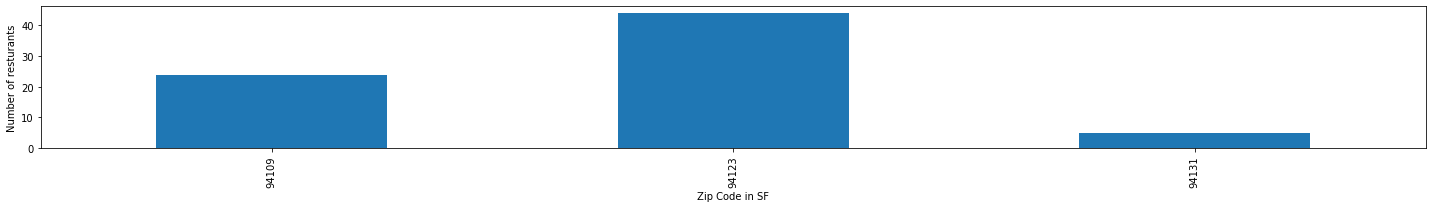

In [79]:
#Ploting the resturant data 

resturant_number = unique_rest.plot(kind="bar", figsize=(20,3))
resturant_number.set_xlabel("Zip Code in SF")
resturant_number.set_ylabel("Number of resturants")

plt.tight_layout()
plt.savefig("charts/restaurants_analysis.png")
plt.show()


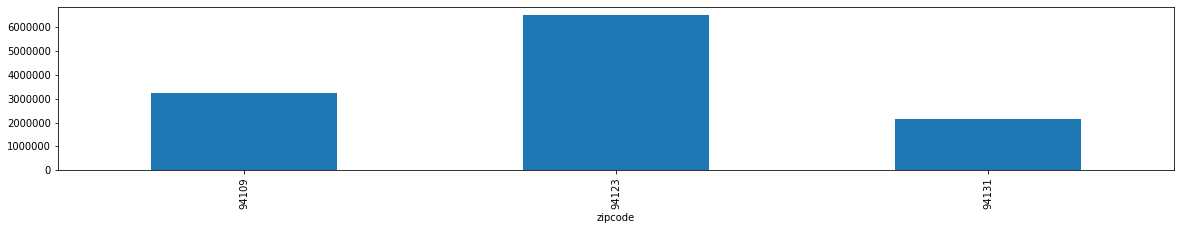

In [80]:
#Merging Starbucks data with housing data and deriving mean avg housing prices for a zipcode
merge_stabucks = pd.merge(clean_housing, df_yelp_sb, on="zipcode", how="inner")
merge_stabucks
clean_housing["zestimate"] = pd.to_numeric(clean_housing["zestimate"])
housing_price_chart = clean_housing.groupby("zipcode")["zestimate"].mean()
housing_price_plt = housing_price_chart.plot(kind="bar", figsize=(20,3))
plt.savefig("charts/property_analysis.png")
plt.show()


In [73]:
#Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("charts/charts1.png")
